<a href="https://colab.research.google.com/github/devdongnim/GoogleColab-MLstudy/blob/main/%ED%98%BC%EA%B3%B5MLDL_3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3-1절

In [16]:
import numpy as np

In [17]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


<function matplotlib.pyplot.show(close=None, block=None)>

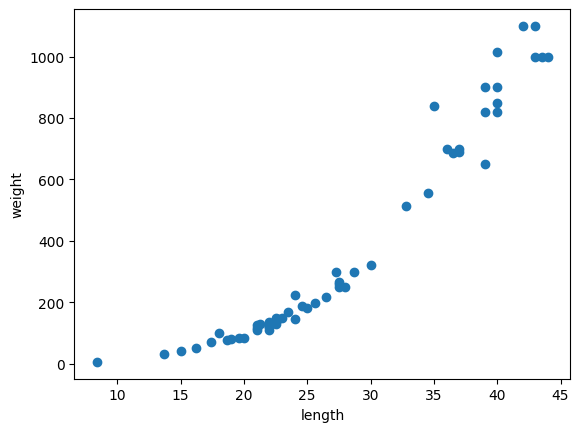

In [18]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [19]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [20]:
train_input = train_input.reshape(-1,1)
test_input= test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [21]:
from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [22]:
print(knr.score(test_input, test_target))

0.992809406101064


In [23]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae= mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [24]:
print(knr.score(train_input, train_target)) #과소적합

0.9698823289099254


In [25]:
knr.n_neighbors =3
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target))

0.9746459963987609
0.9804899950518966


# 3-2절

In [26]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [27]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input =train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [28]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors =3 )
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [29]:
print(knr.predict([[50]]))

[1033.33333333]


In [30]:
import matplotlib.pyplot as plt

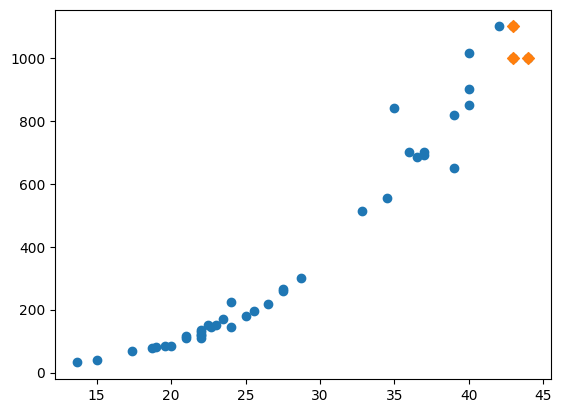

In [31]:
#50cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes],marker='D')

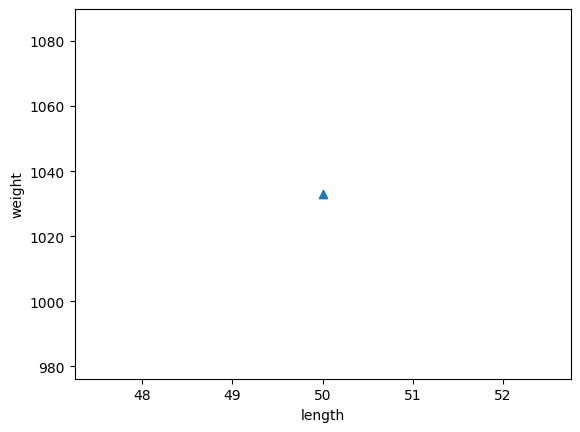

In [32]:
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [33]:
print(np.mean(train_target[indexes]))
print(knr.predict([[100]]))

1033.3333333333333
[1033.33333333]


In [34]:
distances, indexes = knr.kneighbors([[100]])

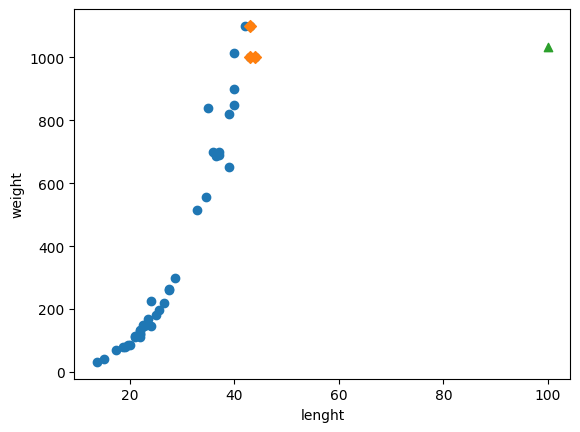

In [35]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100,1033, marker='^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

#선형회귀

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)


LinearRegression()

In [37]:
print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


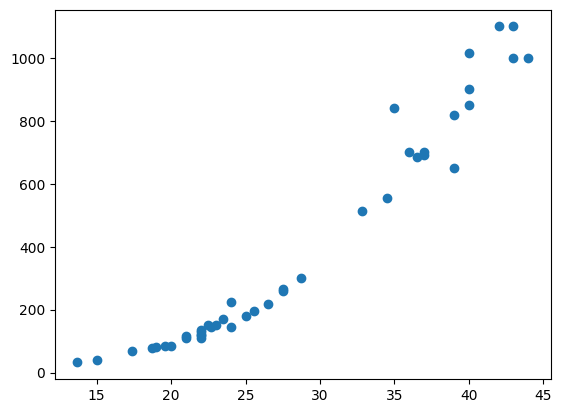

In [39]:
plt.scatter(train_input, train_target)

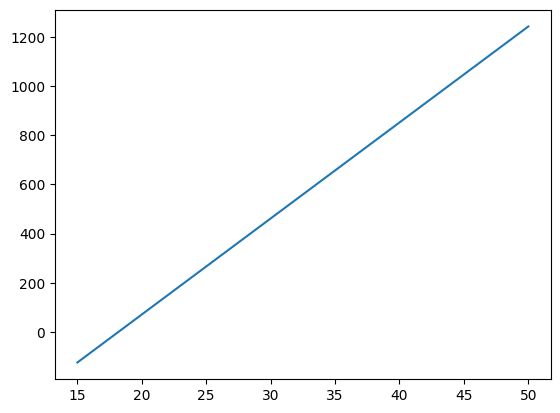

In [43]:
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

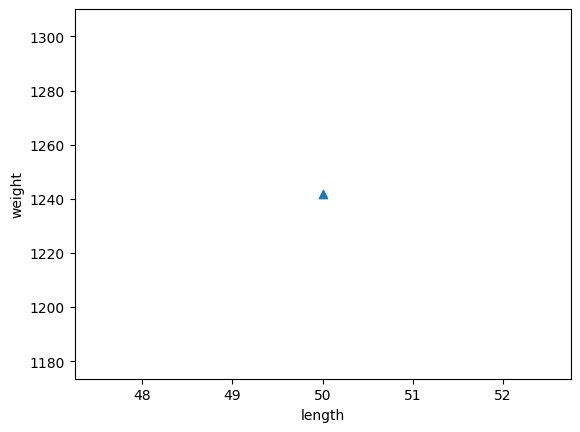

In [44]:
plt.scatter(50,1241.8,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [47]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [48]:
#다항회귀

train_poly =np.column_stack((train_input**2, train_input))
test_poly =np.column_stack((test_input**2, test_input))

In [50]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [53]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [54]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


In [55]:
point = np.arange(15,50)

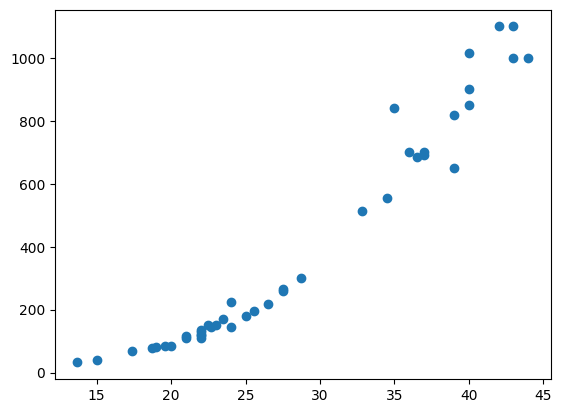

In [56]:
plt.scatter(train_input, train_target)

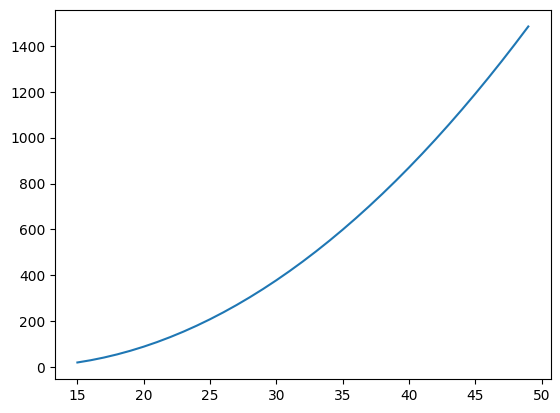

In [59]:
plt.plot(point,1.01*point**2-21.56*point+116.05)

In [60]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


#3-3 특성공학과 규제

In [61]:
import pandas as pd

In [62]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [64]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [67]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [74]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [70]:
print(train_poly.shape)

(42, 9)


In [71]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [72]:
#다중회귀모델 훈련하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [75]:
print(lr.score(test_poly, test_target))

0.9714559911594111


In [76]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [77]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [78]:
print(lr.score(test_poly, test_target))

-144.40579436844948


#규제

In [79]:
#정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#릿지

In [81]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


In [82]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [83]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

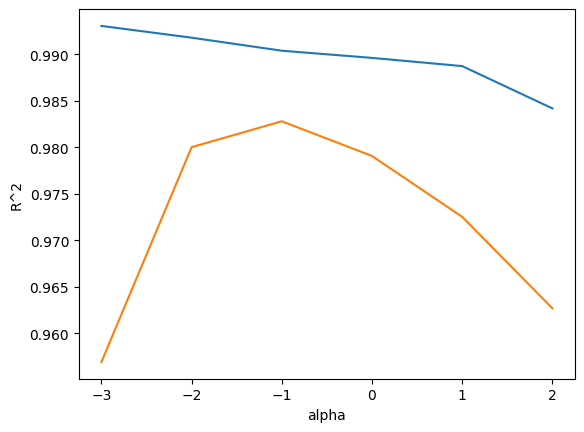

In [84]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [85]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


#라쏘

In [87]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [88]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


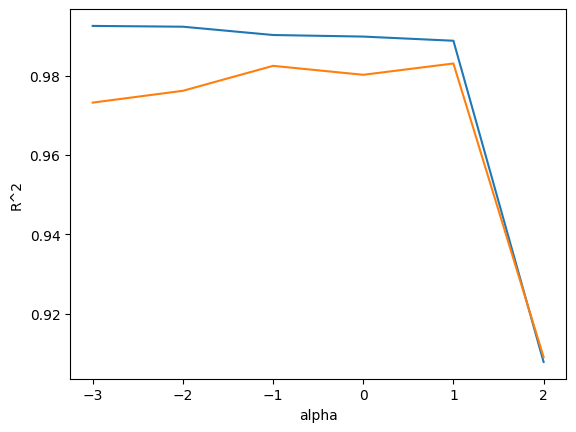

In [89]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [90]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [91]:
print(np.sum(lasso.coef_ == 0))

40
